In [1]:
import torch
from transformers import BertModel, BertTokenizerFast

from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import pandas as pd

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
df = pd.read_csv("sites_out_only_text.csv", encoding="utf-8")
df = df.drop(labels="Unnamed: 0", axis=1)
df

,url_host,title,tod
0,http://yandex.ru,Яндекс,Найдётся всё
1,http://vk.com,Мобильная версия ВКонтакте | ВКонтакте,ВКонтакте – универсальное средство для общения...
2,http://avatars.mds.yandex.net,NaN,410 Gone 410 Gone nginx
3,http://ad.mail.ru,Рекламная платформа myTarget — Сервис таргетир...,Рекламная платформа myTarget — Сервис таргетир...
4,http://yastatic.net,Яндекс,Найдётся всё
...,...,...,...
7259,http://park.sokolniki.com,Парк «Сокольники»,Парк «Сокольники»
7260,http://srgazeta.ru,Стерлитамакский рабочий,"«Стерлитамакский рабочий», \r\n г. Стерлитамак"
7261,http://info-effect.ru,info-effect.ru — Инструкции для интернет польз...,info-effect.ru — Инструкции для интернет польз...
7262,http://neprizyvnoi.ru,Все об армии и призыве: информационная помощь ...,Все об армии и призыве: информационная помощь ...


In [4]:
temp = df["title"].isin(["Just a moment...", "Player", "Error 404 (Not Found)!!1", "DDoS-Guard", "Главная", "Not Found", " 401", "Access denied", "Главная страница", "Access Blocked", "Подождите, мы подбираем зеркало для вас...", "Attention Required! | Cloudflare", np.nan])
df.loc[temp, "title"] = df.loc[temp, "tod"]
df

,url_host,title,tod
0,http://yandex.ru,Яндекс,Найдётся всё
1,http://vk.com,Мобильная версия ВКонтакте | ВКонтакте,ВКонтакте – универсальное средство для общения...
2,http://avatars.mds.yandex.net,410 Gone 410 Gone nginx,410 Gone 410 Gone nginx
3,http://ad.mail.ru,Рекламная платформа myTarget — Сервис таргетир...,Рекламная платформа myTarget — Сервис таргетир...
4,http://yastatic.net,Яндекс,Найдётся всё
...,...,...,...
7259,http://park.sokolniki.com,Парк «Сокольники»,Парк «Сокольники»
7260,http://srgazeta.ru,Стерлитамакский рабочий,"«Стерлитамакский рабочий», \r\n г. Стерлитамак"
7261,http://info-effect.ru,info-effect.ru — Инструкции для интернет польз...,info-effect.ru — Инструкции для интернет польз...
7262,http://neprizyvnoi.ru,Все об армии и призыве: информационная помощь ...,Все об армии и призыве: информационная помощь ...


In [5]:
from fe_modules.site_embeddings import get_embeddings

In [6]:
text_features = df["title"].to_list()

In [7]:
output = get_embeddings(text_features, batch_size=16)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 454/454 [09:45<00:00,  1.29s/it]


In [8]:
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(output.cpu())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7264 samples in 0.005s...
[t-SNE] Computed neighbors for 7264 samples in 1.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7264
[t-SNE] Computed conditional probabilities for sample 2000 / 7264
[t-SNE] Computed conditional probabilities for sample 3000 / 7264
[t-SNE] Computed conditional probabilities for sample 4000 / 7264
[t-SNE] Computed conditional probabilities for sample 5000 / 7264
[t-SNE] Computed conditional probabilities for sample 6000 / 7264
[t-SNE] Computed conditional probabilities for sample 7000 / 7264
[t-SNE] Computed conditional probabilities for sample 7264 / 7264
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.868202
[t-SNE] KL divergence after 1000 iterations: 2.050020


C:\Users\home\AppData\Local\Temp\ipykernel_14596\1141397008.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

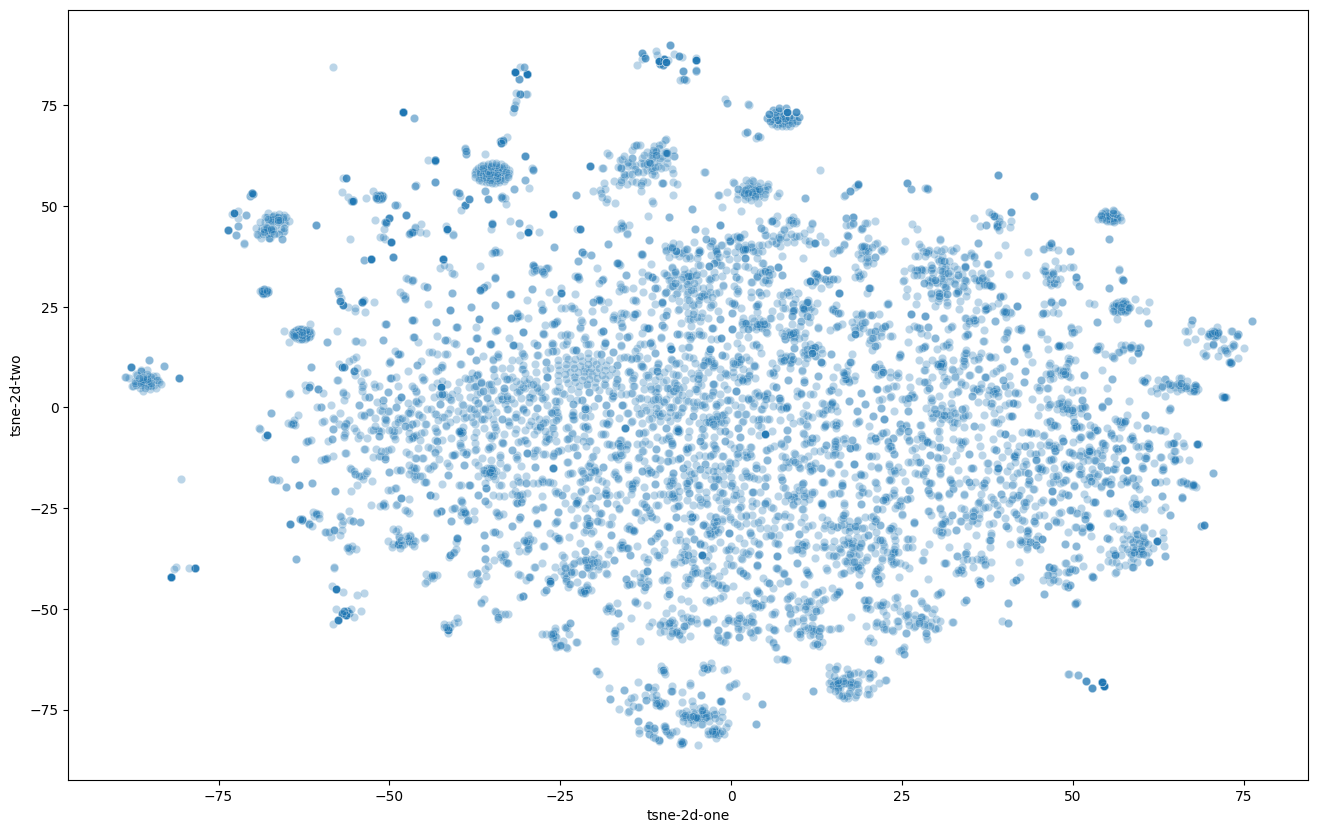

In [10]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [11]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, random_state=42)
projections = tsne.fit_transform(output.cpu())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7264 samples in 0.005s...
[t-SNE] Computed neighbors for 7264 samples in 1.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7264
[t-SNE] Computed conditional probabilities for sample 2000 / 7264
[t-SNE] Computed conditional probabilities for sample 3000 / 7264
[t-SNE] Computed conditional probabilities for sample 4000 / 7264
[t-SNE] Computed conditional probabilities for sample 5000 / 7264
[t-SNE] Computed conditional probabilities for sample 6000 / 7264
[t-SNE] Computed conditional probabilities for sample 7000 / 7264
[t-SNE] Computed conditional probabilities for sample 7264 / 7264
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.892487
[t-SNE] KL divergence after 1000 iterations: 1.843307


In [13]:
import plotly.express as px

fig = px.scatter_3d(
    projections, x=0, y=1, z=2
)
fig.update_traces(marker_size=2)
fig.show()